In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

mg_df = pd.read_csv('mackeyglass.csv')

In [324]:
#Preparação dos dados de entrada e saída.
def Entrada_Saida(K, L):
    x = np.zeros([1, K])
    y = np.zeros([1])
    for i in range(len(P)-K-L+1):
        xr = np.array([])
        for j in range(K):
            xr = np.append(xr, P[i+j])
        x = np.vstack((x, xr))
        y = np.vstack((y, P[i+K+L-1]))
    x = x[1:len(x)]
    y = y[1:len(y)]
    return(x, y)

def Transforma_Entrada(x, V):
    XX_linha = np.zeros([len(x), 1])
    for v in range(V):
        wk = np.random.uniform(-2, 2, 10)
        X_linha = []    
        for i in range(len(x)):
            x_r = x[i, :]
            x_linha = np.tanh(np.dot(wk, x_r)) 
            X_linha.append(x_linha)      
        X_linha = np.reshape(X_linha, (len(X_linha), 1))
        XX_linha = np.hstack((XX_linha, X_linha))
    XX_linha = XX_linha[:, 1:len(XX_linha[0])]
    return XX_linha 


P = mg_df.p.values

K = 10
L = 7
(x, y) = Entrada_Saida(K, L)

#ys_norm = []
#for yps in y:
#    y_norm =  2*(yps-min(y)) / (max(y) - min(y))
#    y_norm = y_norm - 1
#    ys_norm.append(y_norm)

ranw = 21

x_linhas = np.zeros([len(x), 1])
for V in range(1, ranw, 1):  
    x_linha = Transforma_Entrada(x, V*10)      
    x_linhas = np.hstack((x_linhas, x_linha))
    print(V)
    
x_linhas = x_linhas[:, 1:len(x_linhas[0])]

#A 10 primeiras colunas de x_linhas contém os atributos transformados para V = 10, as próximas 20 linhas contém
#os atributos transformados para V = 20, e assim por diante.   

#Separação entre dados de teste e dados de validação
x_linhas_teste = x_linhas[int(0.75*len(x_linhas)):len(x_linhas)]
y_teste = y[int(0.75*len(y)):len(y)]

x_linhas_treino = x_linhas[0:int(0.75*len(x_linhas))]
y_treino = y[0:int(0.75*len(y))]

#Separação das amostras que vão ser efeitivamente utilizadas para a aproximação e as amostras para validação
x_linhas_aprox = x_linhas_treino[0:int(0.7*len(x_linhas_treino))]
y_aprox = y_treino[0:int(0.7*len(y_treino))]

x_linhas_valid =  x_linhas_treino[int(0.7*len(x_linhas_treino)):len(x_linhas_treino)]
y_valid =  y_treino[int(0.7*len(y_treino)):len(y_treino)]

print('ok')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
ok


In [325]:
#Treinamento

def Calcula_Param(x, y, lamb):
    temp = np.ones((len(x), 1))
    fi = np.concatenate((temp, x), axis = 1)
    aux = np.matmul(fi.T, fi) 
    z = np.zeros(len(aux)-1)
    I = np.eye(len(aux)-1)
    I_linha = np.vstack((z, I)) 
    z = np.zeros(len(I_linha))
    z = np.reshape(z, [len(z), 1])
    I_linha = np.hstack((z, I_linha))                                                                                                                                            
    aux = aux + lamb*I_linha
    FI = np.matmul(np.linalg.inv(aux), fi.T)
    w = np.matmul(FI, y)
    return (w)
    
indice_antes = 0
indice_depois = 10

W = np.zeros([1001, 1])
for V in range (1, ranw, 1):
        
    x_linha_aprox_desempacotado = x_linhas_aprox[:, indice_antes : indice_depois]
    
    indice_antes = indice_antes + 10*V
    indice_depois = indice_depois + 10*(V+1)
    
    
    w = Calcula_Param(x_linha_aprox_desempacotado, y_aprox, 100)
    Completa_w = np.zeros([1001-len(w), 1])
    w = np.vstack((w, Completa_w))
    W = np.hstack((W,w))
    
print('ok')
        
        


ok


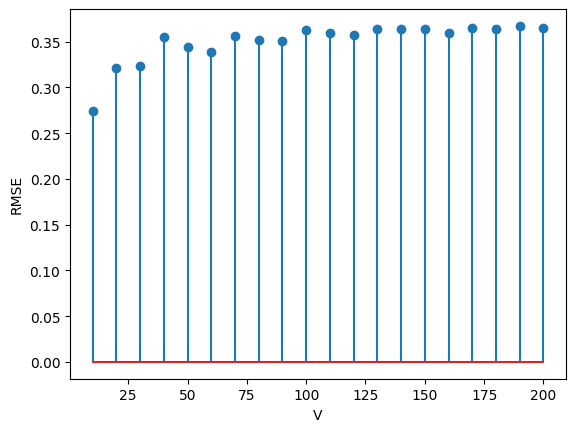

In [326]:
#Validação
def Desempacota_Parametros(V, W):
    w = W[:, V]
    w = w[0:10*V+1]
    w = np.reshape(w, (len(w), 1))
    return w

def Calcula_Saidas(x_valid, w, K, L):
    Y = []
    for i in range(len(x_valid)-K-L+1):
        x = np.array([1])
        x = np.append(x, x_valid[i])        
        x = np.reshape(x, (len(x), 1))
        y_calc = np.dot(w.T,x)  
        y_calc = np.ndarray.tolist(y_calc[0])
        y_esperado = y_valid[i+K+L-1]
        Y.append((y_calc[0], y_esperado))
    return(Y)

def Calcula_RMSE(Y):
    e = 0
    for y in Y:
        y_calc, y_esp = y
        e += (y_calc - y_esp)**2
    e = e/len(Y)
    e = e**(1/2)
    return e

def Desnormaliza(Y):
    Y_desnorm = []
    for y  in Y:
        y_calc, y_esp = y
        y_calc = y_calc + 1
        y_esp = y_esp + 1 
        y_calc_desnorm =  ((max(y_valid) - min(y_valid))*y_calc + 2*(min(y_valid))) / 2
        y_esp_desnorm =  ((max(y_valid) - min(y_valid))*y_esp + 2*(min(y_valid))) / 2
        Y_desnorm.append((y_calc_desnorm, y_esp_desnorm))
    return Y_desnorm

    

L = 7
K = 10

indice_antes = 0
indice_depois = 10

E = []
Vs = []

for V in range (1, len(W[0])):
    
    w = Desempacota_Parametros(V, W)
    
    #print(len(w))
    
    x_linha_valid_desempacotado = x_linhas_valid[:, indice_antes : indice_depois]

    indice_antes = indice_antes + 10*V
    indice_depois = indice_depois + 10*(V+1)
     
    Y = Calcula_Saidas(x_linha_valid_desempacotado, w, K, L)
    
    #Y = Desnormaliza(Y)
    
    
    E.append(Calcula_RMSE(Y))
    Vs.append(10*V)

    
    
fig, ax = plt.subplots()
ax.stem(Vs, E)
ax.set_ylabel('RMSE')
ax.set_xlabel('V')
plt.show()


In [327]:
min(E)

array([0.27386561])

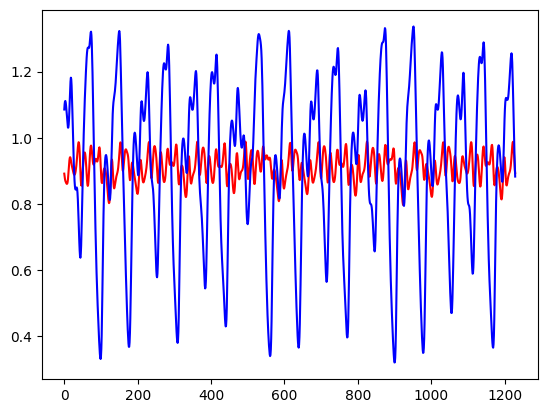

In [328]:
#Comparação com amostras de teste para V = 1
def Calcula_Saidas_teste(x_teste, w, K, L):
    Y_esp = []
    Y_calc = []
    for i in range(len(x_teste)-K-L+1):
        x = np.array([1])
        x = np.append(x, x_teste[i])
        x = np.reshape(x, (len(x), 1))
        y_calc = np.dot(w.T,x)
        Y_calc = np.append(Y_calc, y_calc)
        Y_esp = np.append(Y_esp, y_teste[i+K+L-1])
    return Y_calc, Y_esp

def Desnormaliza(Y_calc, Y_esp):
    ys_calc_desnorm = []
    ys_esp_desnorm = []
    for y_calc  in Y_calc:
        y_calc = y_calc + 1
        y_calc_desnorm =  ((max(y_teste) - min(y_teste))*y_calc + 2*(min(y_teste))) / 2
        ys_calc_desnorm.append(y_calc_desnorm)
        
    for y_esp in Y_esp:
        y_esp = y_esp + 1
        y_esp_desnorm =  ((max(y_teste) - min(y_teste))*y_esp + 2*(min(y_teste))) / 2
        ys_esp_desnorm.append(y_esp_desnorm)
    
    return ys_calc_desnorm, ys_esp_desnorm



K = 10
L = 7
V = 1

w = Desempacota_Parametros(V, W)

x_linha_teste_desempacotado = x_linhas_teste[:, 10*(V-1) : 10*V]

y_calculado, y_esperado = Calcula_Saidas_teste(x_linha_teste_desempacotado, w, K, L)

#y_calculado, y_esperado = Desnormaliza(ys_calculado, ys_esperado)


t = np.arange(len(y_calculado))
fig, bx = plt.subplots()
bx.plot(t, y_calculado, color = "red")
bx.plot(t, y_esperado, color = "blue")
plt.show()


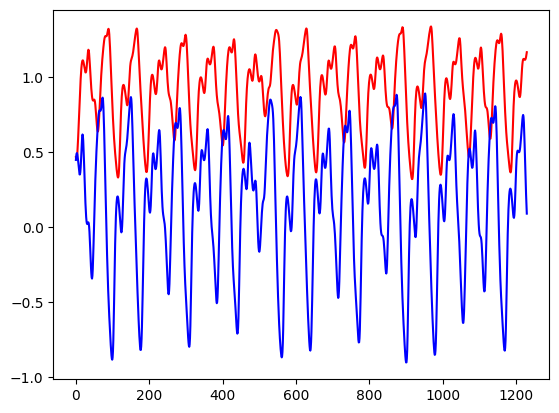

In [315]:
y_teste_2 = y[int(0.75*len(y)):len(y)-K-L+1]
t = np.arange(len(y_esperado))
fig, bx = plt.subplots()
bx.plot(t, y_teste_2, color = "red")
bx.plot(t, y_esperado, color = "blue")
plt.show()

In [297]:


y_teste_2 = np.array([1, 2, 4, 5, 2, 1, 3, 5, 3, 6, 7, 5, 4])

ys_norm = []
for yps in y_teste_2:
    y_norm =  2*(yps-min(y_teste_2)) / (max(y_teste_2) - min(y_teste_2))
    y_norm = y_norm - 1
    ys_norm.append(y_norm)

In [298]:
ys = []
for yps in ys_norm:
    yps = yps + 1
    y_novo =  ((max(y_teste_2) - min(y_teste_2))*yps + 2*(min(y_teste_2))) / 2
    ys.append(y_novo)

In [299]:
y_teste_2

array([1, 2, 4, 5, 2, 1, 3, 5, 3, 6, 7, 5, 4])

In [300]:
ys

[1.0,
 1.9999999999999998,
 4.0,
 5.0,
 1.9999999999999998,
 1.0,
 3.0,
 5.0,
 3.0,
 6.0,
 7.0,
 5.0,
 4.0]